In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
def likelyhood(x,mean,sigma):
    
    return np.exp(-(x-mean)**2/(2*sigma**2))*(1/(np.sqrt(2*np.pi)*sigma))

In [3]:
class Naive_Bayes:
    
    def __init__(self,train_data):
        self.train_data = train_data
        self.mu = train_data.groupby('target').mean().values
        self.std = train_data.groupby('target').std().values
        self.classes_prob = train_data.iloc[:,2].value_counts().values/len(train_data)

    def prediction(self,X): 
        scores = []
        for p in range(len(self.classes_prob)):
            scores.append(likelyhood(X[0],self.mu[p][0],self.std[p][0]) * \
                          likelyhood(X[1],self.mu[p][1],self.std[p][1]) * self.classes_prob[p])

        return np.argmax(scores)

In [4]:
iris = datasets.load_iris()

y = iris.target
iris_data = pd.DataFrame(data = iris.data[:,0:2], columns = ["Sepal Length", "Sepal Width"])
iris_target = pd.DataFrame(data = (iris.target != 0) * 1, columns = ["target"])
iris_df = pd.concat([iris_data, iris_target], axis = 1)
iris_df = iris_df.sample(frac=1)

#training and testing set size
train_size = int(0.65*iris_df.shape[0])
test_size = int(0.35*iris_df.shape[0])

print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

train_data = iris_df.iloc[0:train_size,:]

#testing set split
X_test = iris_df.iloc[train_size:,:]
y_test = iris_df.target[train_size:]

Training set size : 97
Testing set size : 52


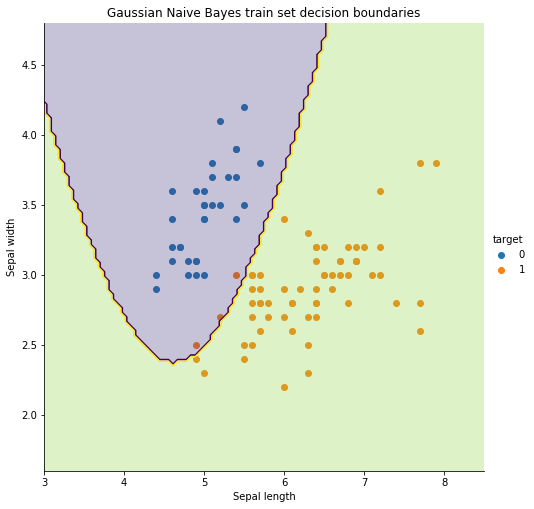

In [5]:
X, Y = np.meshgrid(np.linspace(3, 8.5, 100), np.linspace(1.6, 4.8, 100))

g = sns.FacetGrid(train_data, hue="target", height=7).map(plt.scatter, "Sepal Length","Sepal Width").add_legend()

nb = Naive_Bayes(train_data)
preds = np.array([nb.prediction(np.array([xx,yy]).reshape(-1,1)) for xx, yy in zip(np.ravel(X), np.ravel(Y))])

Z = preds.reshape(X.shape)

g.ax.contourf(X, Y, Z, 2, alpha = 0.3)
g.ax.contour(X, Y, Z, 2)
g.ax.set_xlabel('Sepal length')
g.ax.set_ylabel('Sepal width')
g.ax.set_title('Gaussian Naive Bayes train set decision boundaries')

plt.show()

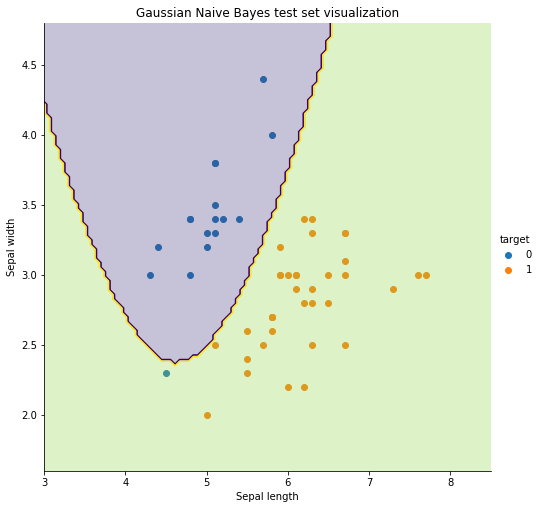

In [6]:
g = sns.FacetGrid(X_test, hue="target", height=7).map(plt.scatter, "Sepal Length","Sepal Width").add_legend()
g.ax.contourf(X, Y, Z, 2, alpha = 0.3)
g.ax.contour(X, Y, Z, 2)
g.ax.set_xlabel('Sepal length')
g.ax.set_ylabel('Sepal width')
g.ax.set_title('Gaussian Naive Bayes test set visualization')

plt.show()

In [7]:
#accuaracy
pred = [nb.prediction(list(i)) for i in X_test.iloc[:,:2].values]
print('Test accuracy score =', np.mean(pred==y_test))

Test accuracy score = 0.9811320754716981


## Pros and Cons of Naive Bayes

# Pros:

    1) The assumption that all features are independent makes Naive Bayes algorithm very fast compared to other 
    algorithms.
        
    2) It works well for small-scale data, can handle multi-category tasks, and is suitable for incremental
    training (that is, it can train new samples in real time).
    
    3) It works well with high-dimensional data such as text classification, email spam detection.
    
    4) Naive Bayes explains the results easily.
    

    
# Cons:
    1) The assumption that all features are independent is not usually the case in real life.
    
    2) If categorical variable has a category (in test data set), which was not observed in training data set, then
    model will assign a 0 (zero) probability and will be unable to make a prediction. 